# Guia do funcionamento da Simulação do Blind Quantum Computing
##### O documento tem o objetivo de demostrar o funcionamento da simulação dos protocolos Childs e BFK no BQC.
#### IMPORTANDO AS DEPENDÊNCIAS


In [1]:
import random
from quantumnet.components import Network, Host
from quantumnet.components import ServerNode, ClientNode, RegularNode
from quantumnet.objects import Qubit, Logger

##### É inicializada a rede, com uma topologia de grade, que apresenta 1 servidor (nó verde) e 8 clientes (nós vermelhos).

Hosts inicializados
Canais inicializados
Pares EPRs adicionados


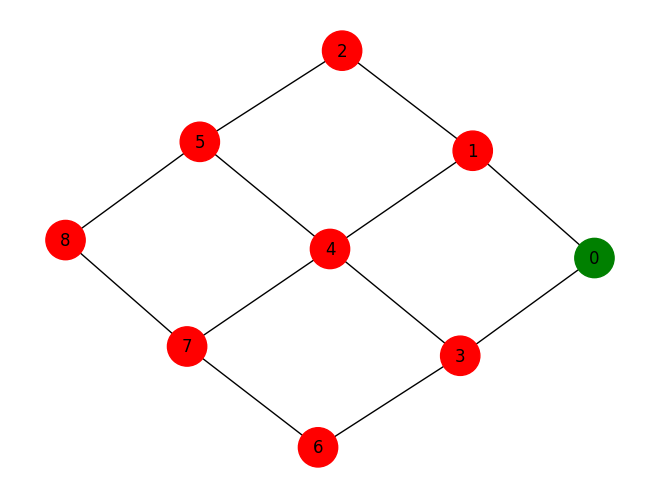

In [2]:
rede = Network()
rede.set_ready_topology('grade',8,3,3)  # Exemplo de uma grade 3x3 com  clientes e 1 servidor
rede.draw()
Logger.activate(Logger)

##### A realização da simulação de uma requesição acontece de forma em que vamos passar uma função para a geração de um circuito aleatório com o número de qubits e número de portas passados como parâmetros e a escolha de um protocolo para executar esse circuito. O protocolo escolhido foi o AC_BQC, Childs, e o cliente é (alice_id).

In [3]:
circuit, num_qubits = rede.generate_random_circuit(num_qubits=5, num_gates=30) 
rede.application_layer.run_app("AC_BQC", alice_id=6, bob_id=0, num_qubits=num_qubits)

        ┌───┐                                                             ┌───┐»
q_0: ───┤ S ├────────────────────────────────────────────────X──X───────X─┤ X ├»
        └───┘           ┌───┐     ┌───┐                ┌───┐ │  │       │ ├───┤»
q_1: ─■───────────────■─┤ Z ├──X──┤ Z ├─────────X───■──┤ S ├─X──┼───■───┼─┤ T ├»
      │               │ └───┘  │  └───┘         │   │  └───┘    │   │   │ └───┘»
q_2: ─┼───────■───────┼────────┼────────■───────┼───■───────────X───┼───┼───■──»
      │ ┌───┐ │ ┌───┐ │        │  ┌───┐ │ ┌───┐ │ ┌───┐           ┌─┴─┐ │   │  »
q_3: ─┼─┤ H ├─┼─┤ H ├─┼────────X──┤ T ├─■─┤ X ├─X─┤ X ├───────────┤ X ├─┼───┼──»
      │ └───┘ │ └───┘ │ ┌───┐┌───┐├───┤   └───┘   └───┘           └───┘ │   │  »
q_4: ─■───────■───────■─┤ Y ├┤ Z ├┤ T ├─────────────────────────────────X───■──»
                        └───┘└───┘└───┘                                        »
«     ┌───┐┌───┐
«q_0: ┤ S ├┤ T ├
«     └───┘└───┘
«q_1: ──────────
«               
«q_2: ──────────
«     ┌

C:\Users\polya\AppData\Roaming\Python\Python311\site-packages\qiskit\visualization\circuit\matplotlib.py:266: FutureWarning: The default matplotlib drawer scheme will be changed to "iqp" in a following release. To silence this warning, specify the current default explicitly as style="clifford", or the new default as style="iqp".
  self._style, def_font_ratio = load_style(self._style)
2024-11-18 11:03:10,798: Circuito aleatório gerado com 5 qubits e 30 portas.
2024-11-18 11:03:10,798: Instrução: {'operation': 'cz', 'qubits': [4, 1]}
2024-11-18 11:03:10,798: Instrução: {'operation': 'h', 'qubits': [3]}
2024-11-18 11:03:10,798: Instrução: {'operation': 'cz', 'qubits': [2, 4]}
2024-11-18 11:03:10,798: Instrução: {'operation': 'h', 'qubits': [3]}
2024-11-18 11:03:10,802: Instrução: {'operation': 'cz', 'qubits': [1, 4]}
2024-11-18 11:03:10,802: Instrução: {'operation': 'z', 'qubits': [1]}
2024-11-18 11:03:10,803: Instrução: {'operation': 'swap', 'qubits': [1, 3]}
2024-11-18 11:03:10,803: Ins

##### Nesse caso, foi executado o protocolo BFK, com parâmetros como 5 qubits para 5 rounds e 30 portas. Além da escolha de um nó como cliente= alice_id.

In [4]:
circuito, num_qubits = rede.generate_random_circuit(num_qubits=5, num_gates=30)
resultado_bfk = rede.application_layer.run_app("BFK_BQC", alice_id=2, bob_id=0, num_qubits=num_qubits, num_rounds=5)

2024-11-18 11:03:11,068: Circuito aleatório gerado com 5 qubits e 30 portas.


                                                         ┌───┐               »
q_0: ──────────■─────────────■───■────■────────X───────■─┤ H ├───────────────»
               │  ┌───┐      │   │    │  ┌───┐ │ ┌───┐ │ ├───┤┌───┐          »
q_1: ──────■───┼──┤ X ├──────┼───┼────■──┤ X ├─┼─┤ Z ├─┼─┤ X ├┤ Y ├──────────»
           │   │  └─┬─┘┌───┐ │   │       └─┬─┘ │ └───┘ │ └─┬─┘├───┤┌───┐┌───┐»
q_2: ──■───┼───┼────■──┤ H ├─┼───┼─────────■───X───X───┼───■──┤ X ├┤ Z ├┤ Y ├»
     ┌─┴─┐ │   │       └───┘ │ ┌─┴─┐┌───┐┌───┐     │   │      └───┘└───┘└───┘»
q_3: ┤ X ├─┼───■────X────────■─┤ X ├┤ S ├┤ S ├─────X───┼───■─────────────────»
     ├───┤ │ ┌───┐  │  ┌───┐   └───┘└───┘└───┘         │   │  ┌───┐          »
q_4: ┤ S ├─■─┤ H ├──X──┤ Z ├───────────────────────────■───■──┤ X ├──────────»
     └───┘   └───┘     └───┘                                  └───┘          »
«                
«q_0: ───────────
«                
«q_1: ───────────
«                
«q_2: ─X──X──────
«      │  │ ┌───┐
«q_3:

2024-11-18 11:03:11,068: Instrução: {'operation': 'cx', 'qubits': [2, 3]}
2024-11-18 11:03:11,068: Instrução: {'operation': 's', 'qubits': [4]}
2024-11-18 11:03:11,068: Instrução: {'operation': 'cz', 'qubits': [1, 4]}
2024-11-18 11:03:11,068: Instrução: {'operation': 'h', 'qubits': [4]}
2024-11-18 11:03:11,068: Instrução: {'operation': 'cz', 'qubits': [3, 0]}
2024-11-18 11:03:11,068: Instrução: {'operation': 'cx', 'qubits': [2, 1]}
2024-11-18 11:03:11,068: Instrução: {'operation': 'swap', 'qubits': [3, 4]}
2024-11-18 11:03:11,068: Instrução: {'operation': 'cz', 'qubits': [0, 3]}
2024-11-18 11:03:11,068: Instrução: {'operation': 'cx', 'qubits': [0, 3]}
2024-11-18 11:03:11,068: Instrução: {'operation': 'h', 'qubits': [2]}
2024-11-18 11:03:11,068: Instrução: {'operation': 'cz', 'qubits': [1, 0]}
2024-11-18 11:03:11,068: Instrução: {'operation': 'cx', 'qubits': [2, 1]}
2024-11-18 11:03:11,068: Instrução: {'operation': 's', 'qubits': [3]}
2024-11-18 11:03:11,068: Instrução: {'operation': 'z

##### Nessa função, podemos coletar a métrica da média da fidelidade dos pares EPRs utilizados nas duas requesições.

In [5]:
rede.application_layer.avg_fidelity_on_applicationlayer()

A média das fidelidades das rotas é: 0.5137


0.5137479054743161

##### Além de printar as fidelidades das rotas.

In [6]:
rede.application_layer.print_route_fidelities()

Fidelidades das rotas utilizadas:
0.6629
0.6346
0.0777
0.7132
0.4803
0.6629
0.6346
0.0777
0.7132
0.4803


##### Pode ser coletado os EPRs utilizados na camada de aplicação, consequentemente nas requesições e protocolos.

In [7]:
#rede.application_layer.print_used_eprs()

In [8]:
rede.get_total_useds_eprs()

2024-11-18 11:03:11,149: Eprs usados na camada PhysicalLayer: 0
2024-11-18 11:03:11,150: Eprs usados na camada LinkLayer: 0
2024-11-18 11:03:11,151: Eprs usados na camada NetworkLayer: 0
2024-11-18 11:03:11,151: Eprs usados na camada ApplicationLayer: 20


20

In [9]:
#taxadesucesso